# Load your trained CNN and understand what exactly it’s learning

## Import Packages

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import itertools as it

physical_devices = tf.config.list_physical_devices('GPU')

if len(physical_devices) >= 1:
    tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## 1. Load your trained MNIST model

In [2]:
model = tf.keras.models.load_model("classify_mnist.h5")

## 2. Analyze the models’ performance by viewing the Confusion Matrix and Classification Report

In [3]:
# fetch and format test data
_, (test_images, test_labels) = mnist.load_data()

x_test = tf.reshape(test_images, [len(test_images), 28, 28, 1])
x_test = tf.cast(x_test, dtype=tf.float32) / 255

In [4]:
# tutorial for generating cnn analysis https://towardsdatascience.com/a-simple-cnn-multi-image-classifier-31c463324fa
# get predictions for all test data
preds = model.predict(x_test)

In [5]:
labels = [0,1,2,3,4,5,6,7,8,9]
y_act = test_labels
y_pred = tf.math.argmax(preds, 1).numpy()

In [6]:
# Difference between Accuracy, precision, recall, and f1 https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9    
classification_metrics = metrics.classification_report(y_act, y_pred)
print(classification_metrics)

precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       1.00      0.98      0.99       958
           7       1.00      0.97      0.98      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [7]:
confusion_matrix = metrics.confusion_matrix(y_act, y_pred, labels=labels, normalize=None)


In [8]:
print(confusion_matrix)

[[ 978    0    0    0    0    0    2    0    0    0]
 [   0 1127    4    1    1    1    0    0    1    0]
 [   3    0 1025    0    1    0    0    0    3    0]
 [   1    0    3 1003    0    2    0    0    1    0]
 [   0    0    3    0  975    0    0    0    2    2]
 [   2    0    1    8    0  877    2    0    0    2]
 [   3    2    0    1    2    6  943    0    1    0]
 [   0    2   21    3    1    0    0  997    1    3]
 [   3    0    2    1    1    1    0    1  963    2]
 [   1    2    0    3    8    8    0    1    7  979]]


### Performance Weaknesses

- With respect to precision, the model over predicted images were the number "two" when they were not. "3", "5", and "8" were also low precision
- With respect to recall, the model did not recognise "7" the most, misclissifying it the most as a "2". "9" was also difficult for the model to recognize, classifying it was a "4", "5", or "8" by mistake

## 3. Identify all samples wrongly classified by the CNN and display them

In [9]:
incorrect_predictions = []

for idx, (actual_val, predicted_val) in enumerate(zip(y_act, y_pred)):
    if actual_val != predicted_val:
        incorrect_predictions.append(idx)

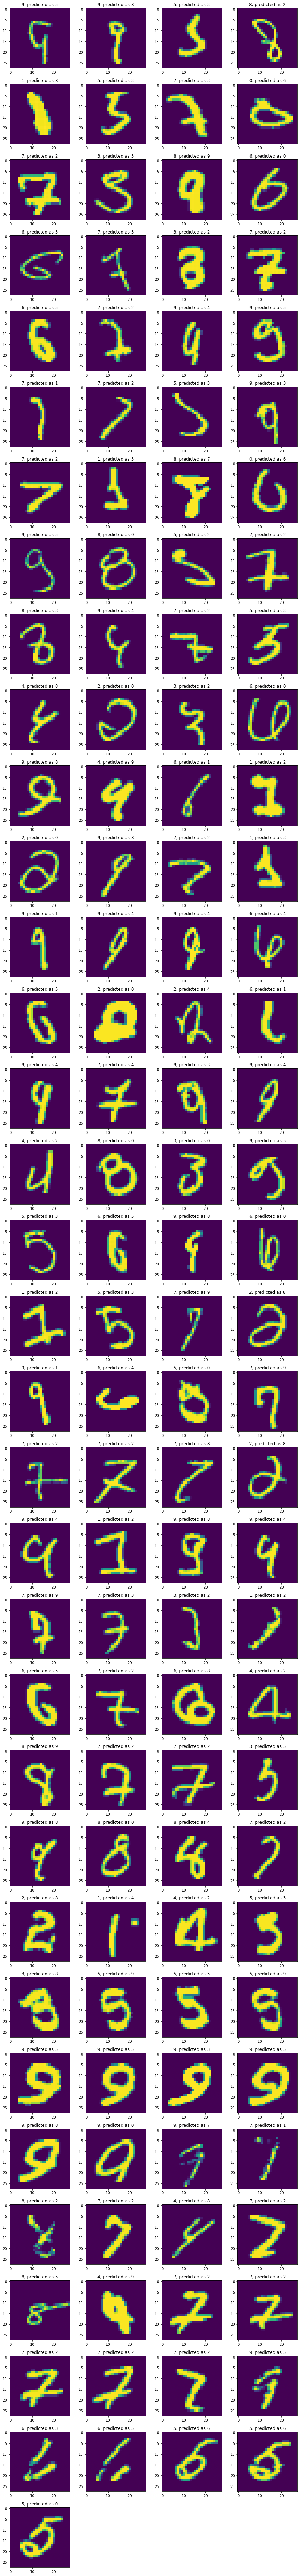

In [25]:
images_to_show = len(incorrect_predictions)
columns = 4
rows = (images_to_show // columns) + 1

fig = plt.figure(figsize=(12, 100))

for img_idx in range(images_to_show):
    instance = incorrect_predictions[img_idx]
    title = "{}, predicted as {}".format(y_act[instance], y_pred[instance])    
    img = test_images[instance]

    img_plot = fig.add_subplot(rows, columns, img_idx+1)

    img_plot.set_title(title)
    img_plot.imshow(img)

plt.tight_layout()
plt.show(fig)

## 4. Extract layer outputs and create our activation model